## **Machine Learning - Criando um projeto passo a passo**
Por: André Elias

Email: andre.elias@ufv.br 



Fala pessoal! 
Estou aqui para compartilhar com vocês um pouco de como foi meu processo de criar meu primeiro projeto de dados completo! 
O projeto consiste em analisar dados de um RH e produzir insights que gerem valor, e também, criar modelos de previsões utilizando Machine Learning. Nesse caso eu previ funcionários que tinham grande chance de sair da empresa e também o desempenho que o funcionário iria desempenhar, massa né? 
Então se você tem interesse em saber como funciona continue lendo, vou tentar deixar o mais simples possível para que todos possam compreender e conseguir acompanhar. 

dataset: https://www.kaggle.com/krismurphy01/data-lab


Então vamos começar!


Sempre começamos um projeto analisando os dados que possuímos. Nesse caso, temos um .csv com dados de 15 mil funcionários. 
Nem sempre recebemos os dados 100% prontos para serem utilizados nos modelos de Machine Learning, então temos que analisar, limpar e tratar esses dados. Utilizaremos as principais ferramentas para esse fim que são: Numpy, Pandas, Seaborn e Matplotlib

In [1]:
#Importação de pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

E também, vamos salvar todos esses dados em um tipo de dado chamado dataframe no qual nomeei como 'dados', olha que coisa.

In [2]:
#Leitura dos dados
dados = pd.read_csv('HR_Engagement_Sat_Sales_UpdatedV4.0.csv') 

## Análise exploratória dos dados

A partir desse dataframe conseguimos analisar algumas informações básicas sobre ele, podemos ver os dados iniciais dele, algumas informações adicionais como média, mediana, moda… E por fim, vamos analisar quais os tipos das variáveis e os dados faltantes delas.


In [3]:
#Visualizar início do df
dados.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


O primeiro pensamento que me veio deste dataset é a alta quantidade de colunas. 62 é um valor muito alto para se trabalhar, e dificulta a visualização dos dados. Então esse é um objetivo que preciso tratar, procurar colunas descartáveis diminuindo o tamanho do dataframe o máximo possível.

In [4]:
#Informações adicionais do df
dados.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,...,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,...,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4893.000000,85.000000,8.000000
max,14999.000000,1.0,1.000000,1.0,3.0,6.0,6.0,1.000000,3.0,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8500.000000,90.000000,10.000000


Aqui podemos analisar alguns dados sobre o dataset como média, mediana, quantidade, etc...

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
ID                                       14999 non-null int64
Name                                     14997 non-null object
Department                               14999 non-null object
GEO                                      14999 non-null object
Role                                     14999 non-null object
Rising_Star                              21 non-null float64
Will_Relocate                            14999 non-null int64
Critical                                 480 non-null float64
Trending Perf                            14999 non-null int64
Talent_Level                             14999 non-null int64
Validated_Talent_Level                   14999 non-null int64
Percent_Remote                           14999 non-null float64
EMP_Sat_OnPrem_1                         14871 non-null float64
EMP_Sat_OnPrem_2                         14871 non-null float64
EMP_Sat_OnPrem

Agora que verificamos as informações dos dados percebemos que precisamos tratar alguns casos.
Primeiramente podemos descartar algumas colunas que não acrescentam nada em nossos insights, verificando as informações que o Kaggle fornece sobre as colunas vemos que as colunas `CSR Factor` e `sales` precisam ser ignoradas pois não representam informações revelantes.
Outras colunas que não irão ajudar são a `ID` e `Name` pois essas informações são pessoais e não influenciam no conjunto da obra.
E por fim, as colunas `Trending Perf`, `Talent_Level` e `Validated_Talent_Level` apresentaram valores únicos em todas as linhas, sendo assim, não apresentando nenhuma informação relevante. Então podemos excluir essas colunas.

In [6]:
#Retira dados irrelevantes
dados = dados.drop(['ID', 'Name', 'Trending Perf', 'Talent_Level', 'Validated_Talent_Level', 'CSR Factor', 'sales', 'Rising_Star', 'Critical'],axis =1)

Certo, colunas retiradas.
Outra coisa que percebi nas informações apresentadas no dados.info() foi que a pesquisa `EMP_Sat_OnPrem` apresentou alguns valores nulos, ou seja, alguns funcionários não responderam a pesquisa.
Podemos tratar esse caso de algumas formas, podemos preenche-los com a média de todos os valores, a mediana ou colocar qualquer valor. Eu não considero essas opções boas pois podem criar um viés na hora de analisar os dados dessa pesquisa.
Então considerei que a melhor forma de tratar esse problema é simplesmente retirar os funcionários que não responderam a pesquisa, como são poucos não vão influenciar muito.

In [7]:
#Retira os funcionários que não responderam a pesquisa 'EMP_Sat_OnPrem'
dados = dados[dados['EMP_Sat_OnPrem_1'].notna()]

In [8]:
#Verifica como ficou o dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14871 entries, 0 to 14870
Data columns (total 53 columns):
Department                               14871 non-null object
GEO                                      14871 non-null object
Role                                     14871 non-null object
Will_Relocate                            14871 non-null int64
Percent_Remote                           14871 non-null float64
EMP_Sat_OnPrem_1                         14871 non-null float64
EMP_Sat_OnPrem_2                         14871 non-null float64
EMP_Sat_OnPrem_3                         14871 non-null float64
EMP_Sat_OnPrem_4                         14871 non-null float64
EMP_Sat_OnPrem_5                         14871 non-null float64
EMP_Sat_Remote_1                         14871 non-null int64
EMP_Sat_Remote_2                         14871 non-null int64
EMP_Sat_Remote_3                         14871 non-null int64
EMP_Sat_Remote_4                         14871 non-null int64
EMP_Sat_

Ok, caso tratado. Mas agora existem outros casos com valores nulos, `Women_Leave` e `Men_Leave`. Esses me causaram uma confusão, pois no site do Kaggle ele descreve os dois como `Homens e mulheres que saíram da empresa`, oque me leva a questionar a existência da coluna `left_Company` que a descrição é a mesma coisa mas sem especificar gêneros.
E essas duas colunas apresentam valores `0`, `1` e `na`. Então não sabemos o que esses `na`s representam, irei ignorar esse valores por enquanto.

In [9]:
#Verificando as inconsistências nos dados
dados['Women_Leave'][dados['left_Company'] == 1]
#Alguns valores em 'Women_Leave' marcam 1 enquanto em 'left_Company' marca 0

445      NaN
446      NaN
447      NaN
448      NaN
449      0.0
450      NaN
451      0.0
452      NaN
453      1.0
454      0.0
455      0.0
456      NaN
457      0.0
458      0.0
459      0.0
460      NaN
461      0.0
462      NaN
463      0.0
464      NaN
465      0.0
466      0.0
467      NaN
468      NaN
469      0.0
470      NaN
471      NaN
472      0.0
473      NaN
474      0.0
        ... 
14780    NaN
14781    1.0
14782    NaN
14783    1.0
14784    0.0
14785    1.0
14786    1.0
14787    1.0
14788    NaN
14789    0.0
14790    1.0
14791    NaN
14792    1.0
14793    NaN
14794    1.0
14795    1.0
14796    0.0
14797    1.0
14798    1.0
14799    NaN
14800    1.0
14801    NaN
14802    1.0
14803    1.0
14804    NaN
14805    1.0
14806    NaN
14807    1.0
14808    NaN
14809    NaN
Name: Women_Leave, Length: 3498, dtype: float64

Analisando esses dados mais de perto consigo provar suas inconsistências. Pois algumas colunas em `Women_Leave` e `Men_Leave` marcadas como `1` estão marcadas em `left_Company` como `0`. Como pode o dataset falar que a mulher ou homem saiu da empresa mas ao mesmo tempo a coluna que regista isso está dizendo o contrário? Além disso, as colunas `Women_Leave` e `Men_Leave` apresentam muitos valores nulos, então não sabemos se a pessoa saiu ou não, de fato.
Então irei considerar dois cenários, um onde os dados de `Women_Leave` e `Men_Leave` estão corretos e outro onde `left_Company` está correto, assim será usado os dois de forma separada para as análises.

Já podemos começar a analisar os dados e gerar alguns insights.
Vamos analisar como os principais dados estão distribuídos.

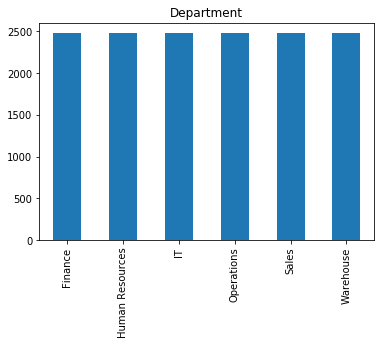

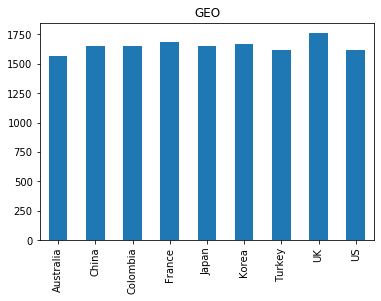

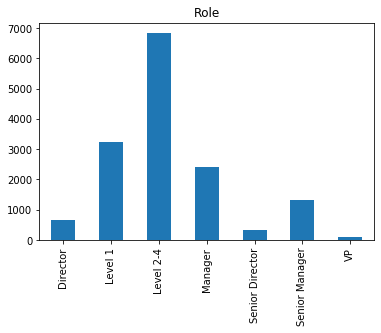

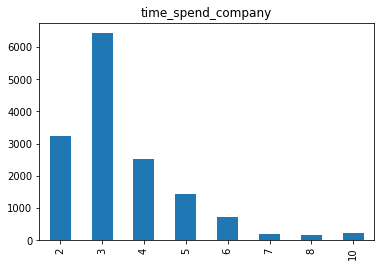

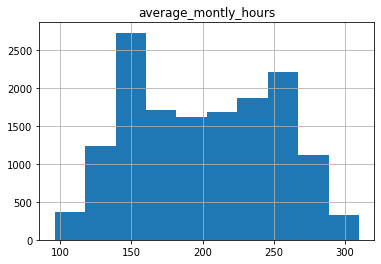

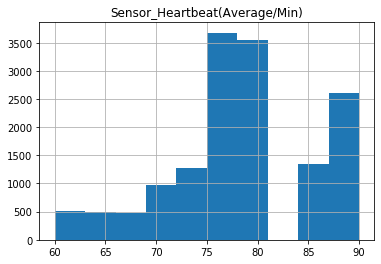

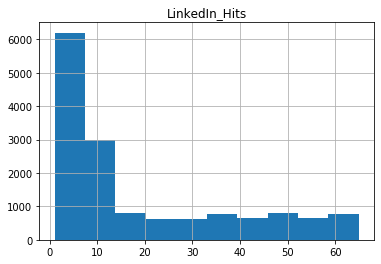

In [10]:
colunas1 = ['Department', 'GEO', 'Role', 'time_spend_company']
colunas2 = ['average_montly_hours', 'Sensor_Heartbeat(Average/Min)', 'LinkedIn_Hits']
for x in colunas1:
    plt.title(x)
    dados[x].value_counts().sort_index().plot.bar()
    plt.show()
for x in colunas2:
    plt.title(x)
    dados[x].hist()
    plt.show()

Agora vamos analisar o desempenho de cada departamento separado por localização baseado na avaliação de seus funcionários.
Podemos utilizar esses dados para bonificação e cobrança de determinados setores.

In [11]:
#Desempenho dos funcionários de cada departamento em todos os países
desempenho = dados.groupby(['GEO', 'Department'])['last_evaluation'].mean().reset_index()
desempenho

,GEO,Department,last_evaluation
0,Australia,Finance,0.713655
1,Australia,Human Resources,0.717418
2,Australia,IT,0.730506
3,Australia,Operations,0.708755
4,Australia,Sales,0.716214
5,Australia,Warehouse,0.719313
6,China,Finance,0.708746
7,China,Human Resources,0.719743
8,China,IT,0.727547
9,China,Operations,0.713979


Já visando a análise de correlação entre os dados podemos modificar alguns dados para se encaixarem no padrão numérico necessário para a análise, então podemos transformar as colunas `Gender` e `salary` de `object` para `int` \
Gênero masculino vira `1` e feminino `2` \
Assim como salários baixos, médios e altos viram `1`, `2` e `3` respectivamente

In [12]:
#Muda dados de gênero e salário para numéricos
dados['Gender'] = dados['Gender'].replace({'M': 1, 'F': 2})
dados['salary'] = dados['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

Outra coisa que é possível fazer é simplificar o resultado das pesquisas fazendo uma média delas. Podemos observar nas informações apresentadas no Kaggle que as pesquisas seguem um mesmo formato, apresentando valores entre 1 e 5.
1 para fraco e 5 para forte em relação ao tema abordado.
Então com as médias feitas podemos descartar as colunas com as pesquisas separadas.
É isso que irei fazer.

In [13]:
#Média do resultado das pesquisas realizada na empresa
dados['EMP_Sat_OnPrem_mean'] = (dados['EMP_Sat_OnPrem_1'] + dados['EMP_Sat_OnPrem_2'] + dados['EMP_Sat_OnPrem_3'] + dados['EMP_Sat_OnPrem_4'] + dados['EMP_Sat_OnPrem_5']) / 5
dados['EMP_Sat_Remote_mean'] = (dados['EMP_Sat_Remote_1'] + dados['EMP_Sat_Remote_2'] + dados['EMP_Sat_Remote_3'] + dados['EMP_Sat_Remote_4'] + dados['EMP_Sat_Remote_5']) / 5
dados['EMP_Engagement_mean'] = (dados['EMP_Engagement_1'] + dados['EMP_Engagement_2'] + dados['EMP_Engagement_3'] + dados['EMP_Engagement_4'] + dados['EMP_Engagement_5']) / 5
dados['EMP_Work_Status_mean'] = (dados['Emp_Work_Status2'] + dados['Emp_Work_Status_3'] + dados['Emp_Work_Status_4'] + dados['Emp_Work_Status_5']) / 4
dados['EMP_Competitive'] = (dados['Emp_Competitive_1'] + dados['Emp_Competitive_2'] + dados['Emp_Competitive_3'] + dados['Emp_Competitive_4'] + dados['Emp_Competitive_5']) / 5
dados['EMP_Collaborative'] = (dados['Emp_Collaborative_1'] + dados['Emp_Collaborative_2'] + dados['Emp_Collaborative_3'] + dados['Emp_Collaborative_4'] + dados['Emp_Collaborative_5']) / 5

In [14]:
#Apaga todos os resultados de pesquisa e mantem só as médias
dados = dados.drop(['EMP_Sat_OnPrem_1', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_5'],axis =1)
dados = dados.drop(['EMP_Sat_Remote_1', 'EMP_Sat_Remote_2', 'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5'],axis =1)
dados = dados.drop(['EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3', 'EMP_Engagement_4', 'EMP_Engagement_5'],axis =1)
dados = dados.drop(['Emp_Work_Status2', 'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5'],axis =1)
dados = dados.drop(['Emp_Competitive_1', 'Emp_Competitive_2', 'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5'],axis =1)
dados = dados.drop(['Emp_Collaborative_1', 'Emp_Collaborative_2', 'Emp_Collaborative_3', 'Emp_Collaborative_4', 'Emp_Collaborative_5'],axis =1)

Certo, tudo parece estar em ordem para começarmos a verificar as correlações entre os dados.
Então vamos calcular!

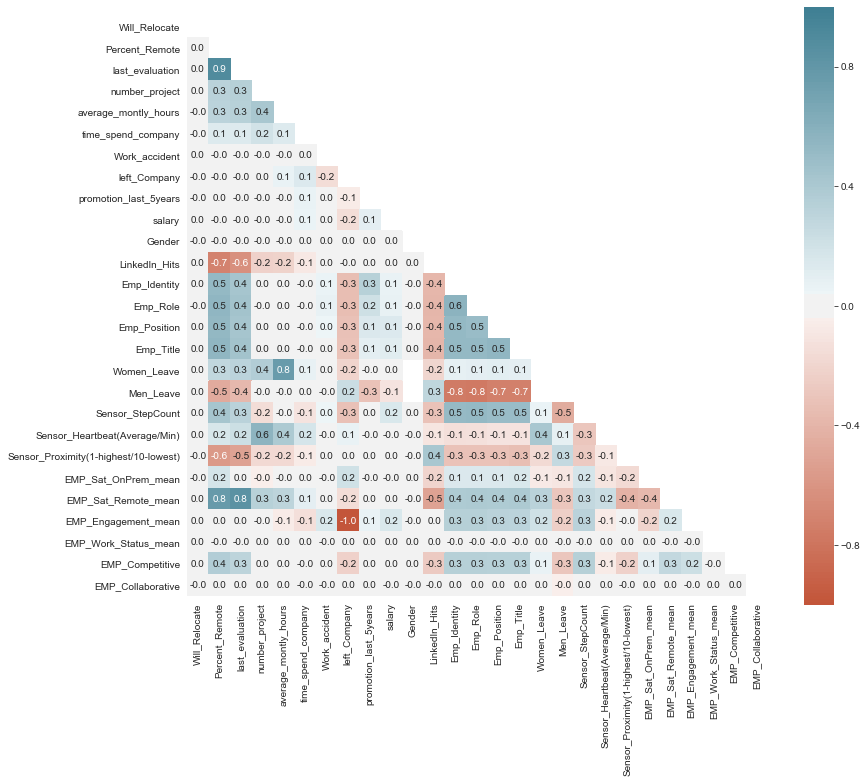

In [15]:
#Verifica correlação dos dados
correlacao = dados.corr()
#Mostra o heatmap
plt.figure(figsize=(13, 11))
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(correlacao, mask=mask, vmin=-1, vmax=1, square=True,  cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.1f')
    plt.show()

Já podemos ver algumas correlações fortes através do heatmap, mas a visualização não ficou muito boa, então irei retirar algumas colunas irrelevantes que não apresentam nenhuma correlação e salvar em um segundo dataframe, assim poderemos visualizar melhor a figura

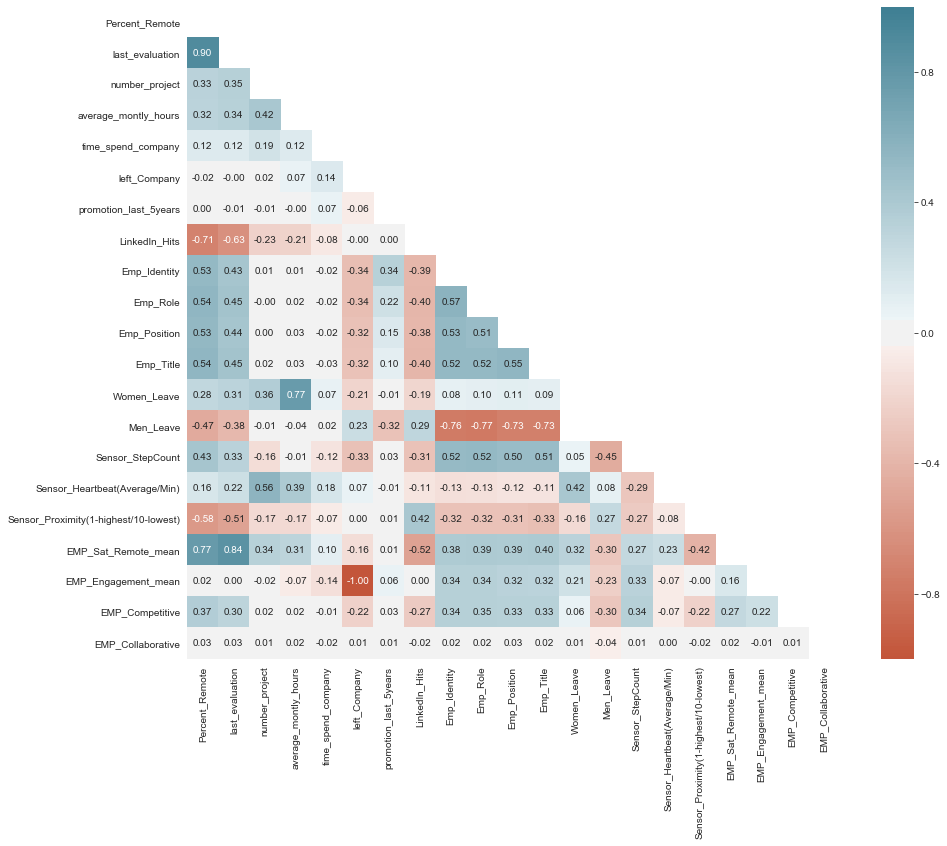

In [16]:
aux = dados
aux = aux.drop(['Will_Relocate', 'Work_accident', 'salary', 'Gender', 'EMP_Work_Status_mean', 'EMP_Sat_OnPrem_mean'],axis =1)
corrAux = aux.corr()
plt.figure(figsize=(15, 12))
mask = np.zeros_like(corrAux)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corrAux, mask=mask, vmin=-1, vmax=1, square=True,  cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f')
    plt.show()

Perfeito!
Ao contrário do que imaginei, os dados `Gender` e `salary` não apresentaram nenhuma informação relevante, então não foram necessários.

Muito bem, agora podemos partir para as análises mais avançadas baseado nas correlações apresentadas.
A primeira mostra que o engajamento está fortemente correlacionado com o abandono da empresa. O funcionário que não se sente engajado tem uma alta probabilidade de abandonar a empresa.

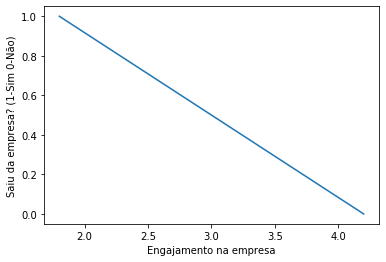

In [17]:
#Engajamento x Abandono da empresa
sns.lineplot(x='EMP_Engagement_mean', y='left_Company', data = dados)
plt.xlabel("Engajamento na empresa")
plt.ylabel("Saiu da empresa? (1-Sim 0-Não)")
plt.show()

Nesse caso abaixo podemos ver que funcionários que fazem a maior parte de seu trabalho remotamente tem melhores avaliações.
Mostrando que trabalhar fisicamente na empresa não apresenta melhores resultados.

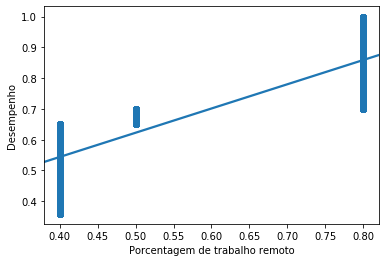

In [19]:
#Trabalho remoto x avaliação de desempenho
sns.regplot(x='Percent_Remote', y='last_evaluation', data = dados)
plt.xlabel("Porcentagem de trabalho remoto")
plt.ylabel("Desempenho")
plt.show()

Seguindo a tema sobre trabalho remoto, podemos observar que os funcionários que fazem maior parte do seu trabalho remotamente tendem a acessar menos o LinkedIn, isso pode demonstrar que os funcionários que trabalham fisicamente acessam essas plataformas para passar o tempo quando não possuem nada para fazer. Os funcionários que estão em casa deixam de acessar o site para passar tempo com suas familias ou algo que está habituado a fazer quando está fora do trabalho.

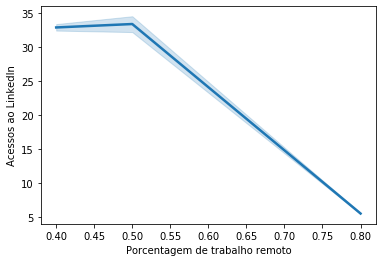

In [20]:
#Trabalho remoto x acessos ao Linkedin
sns.lineplot(x='Percent_Remote', y='LinkedIn_Hits', data=dados, palette="tab10", linewidth=2.5)
plt.xlabel("Porcentagem de trabalho remoto")
plt.ylabel("Acessos ao LinkedIn")
plt.show()

Agora podemos ligar o número de acessos no LinkedIn com o desempenho do funcionário, pois também apresenta uma correlação forte.
Chegamos a conclusão que os funcionários que apresentaram maiores notas de desempenho não acessaram o site tantas vezes como os que foram piores. Mas vemos também que não acessar o LinkedIn não resulta em melhor desempenho, ou seja, não é uma condição suficiente.

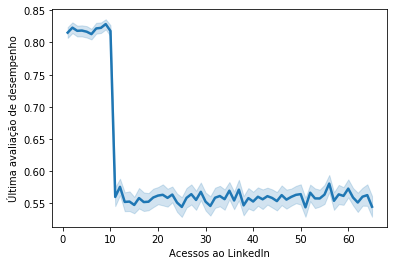

In [21]:
#Acessos ao Linkedin x avaliação de desempenho
sns.lineplot(x='LinkedIn_Hits', y='last_evaluation', data=dados, palette="tab10", linewidth=2.5)
plt.xlabel('Acessos ao LinkedIn')
plt.ylabel('Última avaliação de desempenho')
plt.show()

Agora vamos passar para um nova área de análise. Vamos tentar identificar qual o principal motivo que mulheres e homens saem da empresa.
De acordo com o heatmap de correlação vemos que o principal motivo que leva a mulheres abandonarem a empresa é a carga horária mensal, ou seja, quanto maior a carga horário de uma mulher na empresa, maior a chance dela sair.

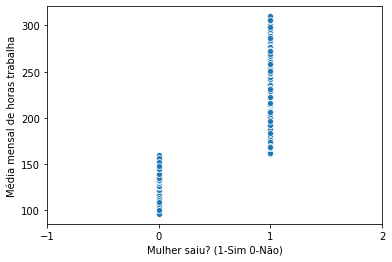

In [22]:
#Correlação do motivo que as mulheres mais abandonam a empresa
sns.scatterplot(x='Women_Leave', y='average_montly_hours', data = dados)
plt.xticks(range(-1, 3))
plt.xlabel('Mulher saiu? (1-Sim 0-Não)')
plt.ylabel('Média mensal de horas trabalha')
plt.show()

Agora os homens apresentam um resultado diferente.
O motivo que levam os homens a abandonarem uma empresa está correlacionada a quatro fatores: Identidade com a empresa, satisfação com seu cargo, posição e seu título.
Ou seja, homens que não se sentem valorizados ou engajados com o seu trabalho tendem a sair.

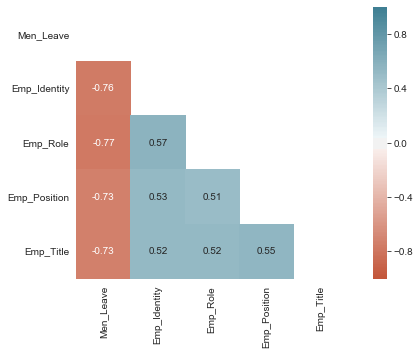

In [23]:
#Correlação do motivo que os homens mais abandonam a empresa
menLeaveCorr = dados.loc[:,['Men_Leave', 'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title']].corr()

plt.figure(figsize=(9, 5))
mask = np.zeros_like(menLeaveCorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(menLeaveCorr, mask=mask, vmin=-1, vmax=1, square=True,  cmap=sns.diverging_palette(20, 220, n=200), annot=True)
    plt.show()

Analisando agora podemos ver que fazer a média do resultado das pesquisas foram um decisão acertada, pois identificamos correlações fortes delas.

Lembrando que algumas visualizações foram feitas utilizando o `left_Company` e outras com `Women_Leave` e `Men_Leave`. Não sabemos qual está de fato correta, mas mostrei os dois casos. Mas agora que iremos passar para a parte de Machine Learning essa inconsistência não pode existir, então irei considerar apenas a `left_Company` para análise. Pois ela apresenta 100% de dados preenchidos, ao contrário dos outros. Então irei desconsiderá-las.

## Machine Learning

Agora irei começar a trabalhar nos modelos de aprendizagem de máquina, primeiro de tudo precisamos importar novos pacotes que serão necessários.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

Para uma análise mais completa dos dados iremos utilizar uma técnica que se chama One Hot Enconding que consiste em transformar valores de string em colunas numércias onde marca `1` para quando o caso for verdadeiro e `0` quando falso.

Um exemplo de colunas: \
\
GEO_France - Geo_US - Geo_Brazil \
0     -       0    -     1 \
\
Nesse caso sabemos que o país não é França nem US, mas sim o Brasil.

In [25]:
#One Hot Encoding das colunas 'Department', 'GEO' e 'Role' que são strings
oneHotEncoding = pd.get_dummies(dados, columns=['Department', 'GEO', 'Role' ])

In [26]:
#Nova correlação dos dados agora incluindo os valores gerados pelo One Hot Encoding
corrEncoding = oneHotEncoding.corr()

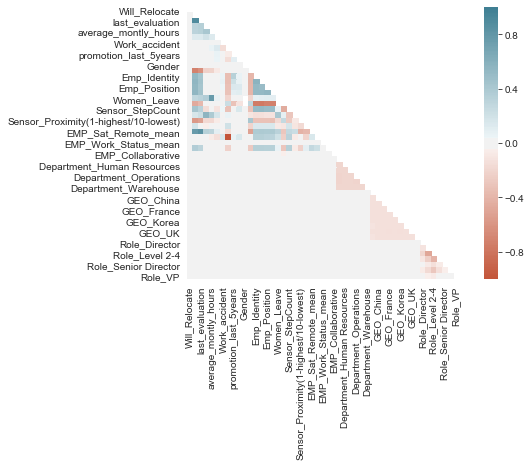

In [27]:
plt.figure(figsize=(9, 5))
mask = np.zeros_like(corrEncoding)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corrEncoding, mask=mask, vmin=-1, vmax=1, square=True,  cmap=sns.diverging_palette(20, 220, n=200))
    plt.show()

Como podemos ver o One Hot Encoding não gerou nenhuma correlação interessante ao contrário do que pensei, então irei voltar a trabalhar com os dados sem ele.

Certo, agora pensando em possibilidades de possíveis modelos eu cheguei a 3 possíveis labels, que são: \
`left_Company` para prever quem vai sair da empresa \
`last_evaluation` que preve o desempenho do funcionário e\
`time_spend_company` que preve quanto tempo o funcionário irá ficar na empresa

Essa última foi logo descartada pois para verificar o tempo que a pessoa vai ficar na empresa temos que considerar apenas os que já saíram, porque quem ainda está na empresa não serve como parâmetro. Se olharmos apenas os funcionários que já saíram ficamos com uma quantidade muito pequena de dados para análise, então infelizmente não será possível. Então irei fazer apenas dos dois primeiros.

### Previsão de quem irá sair da empresa

In [28]:
#Separa oque são as features e o target
features = dados.drop(columns=['left_Company', 'Women_Leave', 'Men_Leave', 'EMP_Engagement_mean']).select_dtypes(exclude='object')
target = dados.left_Company

Aqui eu tive que retirar a pesquisa de angajamento `EMP_Engagement_mean` pois ela apresenta uma correlação de 100% com o `left_Company`, e isso irá gerar uma predição de 100% também. Então irei considera-la e tentar descobrir quem irá sair da empresa sem essa pesquisa.

Também retirei o `left_Company` pois é o target e `Women_Leave`/`Men_Leave` pois apresentam valores nulos e estamos desconsiderando elas nessa segunda etapa. E por fim, retirei os valores string.

In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14871 entries, 0 to 14870
Data columns (total 23 columns):
Will_Relocate                            14871 non-null int64
Percent_Remote                           14871 non-null float64
last_evaluation                          14871 non-null float64
number_project                           14871 non-null int64
average_montly_hours                     14871 non-null int64
time_spend_company                       14871 non-null int64
Work_accident                            14871 non-null int64
promotion_last_5years                    14871 non-null int64
salary                                   14871 non-null int64
Gender                                   14871 non-null int64
LinkedIn_Hits                            14871 non-null int64
Emp_Identity                             14871 non-null int64
Emp_Role                                 14871 non-null int64
Emp_Position                             14871 non-null int64
Emp_Title          

Tudo parece em ordem

Agora irei separar o arquivo em 80% para treino e 20% para teste, assim podemos validar o modelo e verificar sua eficácia utilizando o teste.

In [30]:
#Separa 80% treino e 20% teste
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [31]:
#Importa o medelo de Regressão Logística que iremos utilizar
model = LogisticRegression()

Ok, vamos treinar o modelo.

In [32]:
#Treina o modelo
model.fit(x_train, y_train)

c:\users\andré elias\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Modelo treinado agora precisamos fazer algumas manipulações de dados

In [33]:
#Salvamos o resultado do predict
predict = model.predict(x_test)

In [34]:
#Transforma o y_test que são os resultados verdadeiros em um dataframe para poder ser manipulado
y_test = y_test.to_frame()

In [35]:
#Verifica os resultados verdadeiros
y_test

,left_Company
5788,0
5753,0
3460,0
4685,0
10170,0
6236,0
6423,0
4755,0
1984,1
3161,1


In [36]:
#Cria uma nova coluna no dataframe com o predict
y_test['predict'] = predict

In [37]:
#Verifica o dataframe
y_test

,left_Company,predict
5788,0,0
5753,0,0
3460,0,0
4685,0,0
10170,0,0
6236,0,0
6423,0,0
4755,0,0
1984,1,1
3161,1,0


In [38]:
#Verifica onde o modelo errou, nesse casso erramos 477 de 2975 casos.
y_test[y_test['left_Company'] != y_test['predict']]

,left_Company,predict
3161,1,0
9772,1,0
561,1,0
2894,1,0
3657,1,0
13695,1,0
2517,1,0
575,1,0
2898,1,0
3629,1,0


Parece que o modelo gerou bons resultados, mas vamos usar a função score para verificar o resultado com precisão.

In [39]:
#SCORE
model.score(x_test, y_test.drop(columns = ['predict']))

0.8383193277310924

83% de acerto é um excelente resultado, considero que ele foi um sucesso.

Por fim vamos verificar a matriz de confusão para uma visualização melhor do resultado

In [40]:
#Matriz de confusão
confusion_matrix(y_test.left_Company, y_test.predict)

array([[2131,  164],
       [ 317,  363]], dtype=int64)

Positivos verdadeiros: 2138 \
Falsos positivos: 157 \
Negativos verdadeiros: 360 \
Falsos negativos: 320 \


### Previsão de desempenho do funcionário

Aqui irei seguir os mesmo passos da modelo anterior, mudando somente de `Regressão Logística` para `Regressão Linear`

In [41]:
#Separa oque são as features e o target
features = dados.drop(columns=['last_evaluation', 'Women_Leave', 'Men_Leave']).select_dtypes(exclude='object')
target = dados.last_evaluation

In [42]:
#Separa 80% treino e 20% teste
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [43]:
#Importa o medelo de Regressão Linear que iremos utilizar
model = LinearRegression()

In [44]:
#Treina o modelo
model.fit(x_train, y_train)

LinearRegression()

In [45]:
#Salvamos o resultado do predict
predict = model.predict(x_test)

In [46]:
#Transforma o y_test que são os resultados verdadeiros em um dataframe para poder ser manipulado
y_test = y_test.to_frame()

In [47]:
#Cria uma nova coluna no dataframe com o predict
y_test['predict'] = predict

In [48]:
#Verifica o dataframe
y_test

,last_evaluation,predict
5788,0.64,0.628162
5753,0.64,0.628269
3460,0.55,0.508807
4685,0.59,0.505269
10170,0.83,0.843366
6236,0.66,0.682965
6423,0.67,0.677108
4755,0.60,0.661309
1984,0.51,0.518727
3161,0.54,0.536483


A diferença desse modelo de Regressão Linear está na forma de avaliarmos o seu desempenho, utilizarei o método Root Mean Squared Error

In [49]:
sqrt(mean_squared_error(y_test.last_evaluation, y_test.predict))

0.06300464201985528

Chegamos a um erro médio de apenas 6% oque é um grande sucesso para o modelo!

Com isso finalizamos a análise de dados desse dataset, considero que conseguimos gerar muito valor com essas análises.

Fico feliz por conseguir finalizar esse grande projeto e espero que gostem dos resultados!